# CS380 UNet Evaluate

**Author:** Will Hewitt

### Purpose

Evaluates the test (independent) dataset on a UNet model

### Conda Environment

`conda activate heartlab`

### Data Sources

`/data/camus/v5/{x_test | y_test}.npy`

### References

CS380-UNet.ipynb and CS380-Data-Prepare.ipynb

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

sys.path.append('../segmentation_utils')

from segmentation_utils import jaccard_distance_loss, dice_loss, weighted_categorical_crossentropy

Using TensorFlow backend.


###### Load Model

In [2]:
model = load_model('models/20200521-004857.h5', 
                   custom_objects={'jaccard_distance_loss': jaccard_distance_loss, 
                                   'dice_coef_loss': dice_loss,
                                  'loss': weighted_categorical_crossentropy(np.array([0.5, 3, 3, 3]))})

###### Load Test Data

In [3]:
x_test = np.load('/srv/jupyterhub_notebooks/data/camus/v5/x_test.npy')
y_test = np.load('/srv/jupyterhub_notebooks/data/camus/v5/y_test.npy')

###### Side-by-Side of GT and Pred of first image

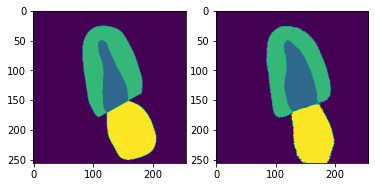

In [4]:
y_pred = model.predict(np.array([x_test[60]]))
plt.subplot(1, 2, 1)
plt.imshow(np.argmax(y_test[60], axis=2))
plt.subplot(1, 2, 2)
plt.imshow(np.argmax(y_pred[0], axis=2))
plt.show()

###### Calculate Loss and Mean IoU on Test Data

In [5]:
model.evaluate(x=x_test, y=y_test )

90/90 [==============================] - 6s 64ms/sample - loss: 0.4543 - mean_io_u: 0.6691


[0.45426508320702447, 0.66910684]

In [9]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        concatenate[0][0]                
____________________________________________________________________________________________

In [10]:
print(model.loss)

<function weighted_categorical_crossentropy.<locals>.loss at 0x7f9778c28d90>
